In [1]:
#This notebook is for my Coursera Data Science Capstone

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [5]:
df= pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df['SEVERITYCODE'].value_counts() #1 is property damage, 2 is personal damage

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
from sklearn.utils import resample

In [9]:
df_1= df[df.SEVERITYCODE==1]
df_2= df[df.SEVERITYCODE==2]
df_1_1 = resample(df_1, 
                        n_samples=58188,
                        random_state =123)
df_balanced = pd.concat([df_1_1,df_2])

df_balanced.SEVERITYCODE.value_counts() #balanced data with same number of each class of accident

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [10]:
df_balanced.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
22536,1,-122.346246,47.617908,26946,40905,40905,2190432,Matched,Intersection,29651.0,...,Wet,Dark - Street Lights On,NaN,5330033.0,NaN,15,From same direction - one left turn - one stra...,0,0,N
39812,1,-122.316937,47.620520,45068,58413,58413,2178396,Matched,Block,NaN,...,Dry,Daylight,NaN,6139054.0,NaN,14,From same direction - both going straight - on...,0,0,N
25317,1,-122.373595,47.662932,29906,44763,44763,1794767,Matched,Intersection,25457.0,...,Dry,Daylight,NaN,5068030.0,NaN,10,Entering at angle,0,0,N
170256,1,-122.313598,47.569517,190232,251988,252588,3756171,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
183714,1,-122.303321,47.580505,206555,325075,326575,3820889,Matched,Block,NaN,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N


In [11]:
df_balanced['SPEEDING'].value_counts() 

Y    5968
Name: SPEEDING, dtype: int64

In [12]:
# Change Speeding Data to numbers. 0 = Not Speeding, 1 = Speeding
df_balanced['SPEEDING'].replace('Y', 1, inplace=True)
df_balanced['SPEEDING'].replace(np.nan, 0, inplace=True)

In [13]:
df_balanced['SPEEDING'].value_counts() #Most cases did not have speeding reported

0.0    110408
1.0      5968
Name: SPEEDING, dtype: int64

In [14]:
df_balanced['UNDERINFL'].value_counts()

N    60389
0    47390
Y     3299
1     2620
Name: UNDERINFL, dtype: int64

In [15]:
df_balanced['UNDERINFL'].replace('N', 0, inplace=True)
df_balanced['UNDERINFL'].replace('Y', 1, inplace=True)
df_balanced['UNDERINFL'].replace(np.nan, 0, inplace=True)

In [16]:
df_balanced['UNDERINFL'].value_counts() #Most Cases did not have someone under the influence

0    63067
0    47390
1     3299
1     2620
Name: UNDERINFL, dtype: int64

In [17]:
df_balanced['WEATHER'].value_counts()

Clear                       67853
Raining                     20572
Overcast                    16757
Unknown                      7050
Snowing                       480
Other                         405
Fog/Smog/Smoke                338
Sleet/Hail/Freezing Rain       75
Blowing Sand/Dirt              29
Severe Crosswind               18
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [18]:
#Change weather data to numbers. 0 = Clear,1 = Cloudy, 2 = Windy, 3 = Precipitation 
df_balanced['WEATHER'].replace('Clear', 0, inplace=True)
df_balanced['WEATHER'].replace('Raining', 3, inplace=True)
df_balanced['WEATHER'].replace('Overcast', 1, inplace=True)
df_balanced['WEATHER'].replace('Snowing', 3, inplace=True)
df_balanced['WEATHER'].replace('Other', 'Unknown', inplace=True)
df_balanced['WEATHER'].replace('Fog/Smog/Smoke', 1, inplace=True)
df_balanced['WEATHER'].replace('Sleet/Hail/Freezing Rain', 3, inplace=True)
df_balanced['WEATHER'].replace('Blowing Sand/Dirt', 2, inplace=True)
df_balanced['WEATHER'].replace('Severe Crosswind', 2, inplace=True)
df_balanced['WEATHER'].replace('Partly Cloudy', 1, inplace=True)
df_balanced['WEATHER'].replace(np.nan, 'Unknown', inplace=True)

In [88]:
df_balanced['WEATHER'].replace('Unknown', 2, inplace=True)
mean = df_balanced['WEATHER'].mean()

In [89]:
df_balanced['WEATHER'].replace(2, mean, inplace=True)

In [90]:
df_balanced['WEATHER'].value_counts()

0.000000    67853
3.000000    21127
1.000000    17098
0.868521    10298
Name: WEATHER, dtype: int64

In [20]:
df_balanced['LIGHTCOND'].value_counts()

Daylight                    71665
Dark - Street Lights On     28817
Unknown                      6248
Dusk                         3649
Dawn                         1495
Dark - No Street Lights       832
Dark - Street Lights Off      693
Other                         129
Dark - Unknown Lighting         9
Name: LIGHTCOND, dtype: int64

In [21]:
#Change Light Condition data to numbers. 0 = Light, 1 = Dusk/Dawn, 2 = Dark
df_balanced['LIGHTCOND'].replace('Daylight', 0, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - Street Lights On', 1, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - No Street Lights', 2, inplace=True)
df_balanced['LIGHTCOND'].replace('Dusk', 1, inplace=True)
df_balanced['LIGHTCOND'].replace('Dawn', 1, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - Street Lights Off', 2, inplace=True)
df_balanced['LIGHTCOND'].replace('Dark - Unknown Lighting', 2, inplace=True)
df_balanced['LIGHTCOND'].replace('Other','Unknown', inplace=True)
df_balanced['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)

In [85]:
df_balanced['LIGHTCOND'].replace('Unknown', 2, inplace=True)
mean = df_balanced['LIGHTCOND'].mean()

In [86]:
df_balanced['LIGHTCOND'].replace(2, mean, inplace=True)

In [87]:
df_balanced['LIGHTCOND'].value_counts()

0.000000    71665
1.000000    33961
0.476567    10750
Name: LIGHTCOND, dtype: int64

In [23]:
df_balanced['ROADCOND'].value_counts()

Dry               76055
Wet               29225
Unknown            6927
Ice                 654
Snow/Slush          521
Other                83
Standing Water       73
Sand/Mud/Dirt        48
Oil                  39
Name: ROADCOND, dtype: int64

In [24]:
#Change Road Condition data to numbers. 0 = Dry Pavement, 1 = Not Pavement/Wet
df_balanced['ROADCOND'].replace('Dry', 0, inplace=True)
df_balanced['ROADCOND'].replace('Wet', 1, inplace=True)
df_balanced['ROADCOND'].replace('Ice', 1, inplace=True)
df_balanced['ROADCOND'].replace('Snow/Slush', 1, inplace=True)
df_balanced['ROADCOND'].replace('Other', 'Unknown', inplace=True)
df_balanced['ROADCOND'].replace('Standing Water', 1, inplace=True)
df_balanced['ROADCOND'].replace('Sand/Mud/Dirt', 1, inplace=True)
df_balanced['ROADCOND'].replace('Oil', 1, inplace=True)
df_balanced['ROADCOND'].replace(2, 1, inplace=True)
df_balanced['ROADCOND'].replace(np.nan, 'Unknown', inplace=True)

In [68]:
df_balanced['ROADCOND'].replace('Unknown', 2, inplace=True)
mean = df_balanced['ROADCOND'].mean()

In [69]:
df_balanced['ROADCOND'].replace(2, mean, inplace=True)

In [71]:
df_balanced['ROADCOND'].value_counts()

0.000000    76055
1.000000    30560
0.430346     9761
Name: ROADCOND, dtype: int64

In [91]:
df_balanced.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
22536,1,-122.346246,47.617908,26946,40905,40905,2190432,Matched,Intersection,29651.0,...,1.0,1.0,NaN,5330033.0,0.0,15,From same direction - one left turn - one stra...,0,0,N
39812,1,-122.316937,47.620520,45068,58413,58413,2178396,Matched,Block,NaN,...,0.0,0.0,NaN,6139054.0,0.0,14,From same direction - both going straight - on...,0,0,N
25317,1,-122.373595,47.662932,29906,44763,44763,1794767,Matched,Intersection,25457.0,...,0.0,0.0,NaN,5068030.0,0.0,10,Entering at angle,0,0,N
170256,1,-122.313598,47.569517,190232,251988,252588,3756171,Matched,Block,NaN,...,0.0,0.0,NaN,NaN,0.0,23,From same direction - all others,0,0,N
183714,1,-122.303321,47.580505,206555,325075,326575,3820889,Matched,Block,NaN,...,0.0,1.0,NaN,NaN,0.0,32,One parked--one moving,0,0,N


In [92]:
#New Data Frame with just variables I will use
selected_columns=df_balanced[['INCKEY','SPEEDING','UNDERINFL','WEATHER','LIGHTCOND','ROADCOND', 'SEVERITYCODE']]

In [93]:
df_a=selected_columns

In [94]:
df_a.head()

,INCKEY,SPEEDING,UNDERINFL,WEATHER,LIGHTCOND,ROADCOND,SEVERITYCODE
22536,40905,0.0,0,0.0,1.0,1.0,1
39812,58413,0.0,0,0.0,0.0,0.0,1
25317,44763,0.0,0,0.0,0.0,0.0,1
170256,251988,0.0,0,1.0,0.0,0.0,1
183714,325075,0.0,0,0.0,1.0,0.0,1


In [95]:
df_a.describe()

,INCKEY,SPEEDING,WEATHER,LIGHTCOND,ROADCOND,SEVERITYCODE
count,116376.000000,116376.000000,116376.000000,116376.000000,116376.000000,116376.000000
mean,141957.407816,0.051282,0.768398,0.335843,0.298692,1.500000
std,87012.123560,0.220573,1.121211,0.447227,0.434644,0.500002
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,70813.750000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,124341.000000,0.000000,0.000000,0.000000,0.000000,1.500000
75%,205005.500000,0.000000,1.000000,1.000000,1.000000,2.000000
max,331454.000000,1.000000,3.000000,1.000000,1.000000,2.000000


In [130]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'SEVERITYCODE')

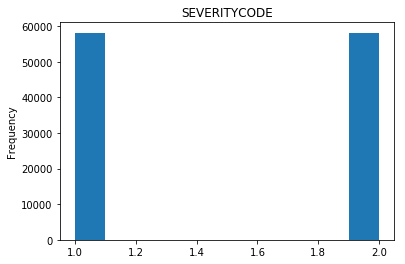

In [131]:
df_a['SEVERITYCODE'].plot(kind='hist')
plt.title('SEVERITYCODE')

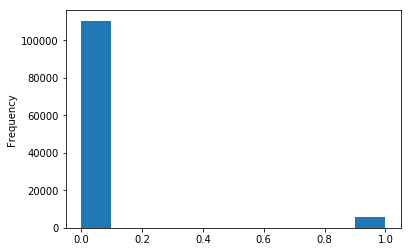

In [149]:
df_a['SPEEDING'].plot(kind='Hist')

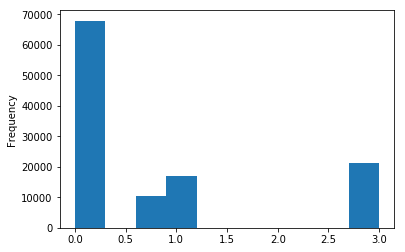

In [151]:
df_a['WEATHER'].plot(kind='Hist')

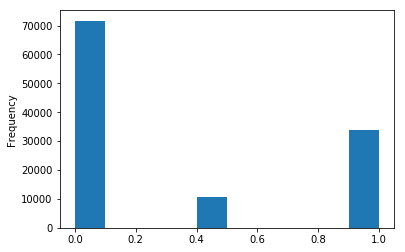

In [152]:
df_a['LIGHTCOND'].plot(kind='Hist')

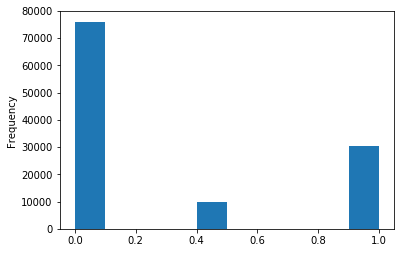

In [153]:
df_a['ROADCOND'].plot(kind='Hist')

In [98]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [99]:
df_ax = ['SPEEDING', 'UNDERINFL', 'WEATHER', 'LIGHTCOND', 'ROADCOND']

In [100]:
X =df_a[df_ax]

In [101]:
y=df_a['SEVERITYCODE']

In [102]:
#Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [144]:
#Decision Tree

In [126]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [127]:
#Accuracy of Decision Tree
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5617678228740011


In [142]:
#Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression

In [138]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)

In [139]:
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [145]:
#Accuracy of Logistic Regression
print ("Accuracy", metrics.accuracy_score(yhatLR,y_test))

Accuracy 0.5504253429954459
